<a href="https://colab.research.google.com/github/MatiasJJ/ATML/blob/edits/Ex6/Ex6_Matias_Jakub_Madeleine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np                        # for numerics
import pandas as pd                       # for dataframes
import seaborn as sns                     # for nice plotting
import matplotlib.pyplot as plt           # for plotting at all
import plotly.express as px

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, Normalizer
from scipy.optimize import linear_sum_assignment

# Exercise Set 6

Submission DL 19 May 9:15. The solutions will be presented in a session at noon 19 May

Madeleine Ekblom, Matias Jääskeläinen, Jakub Kubečka

## Problem 1

*Learning objective: familiarity with the concepts of k-means clustering*

For this problem you can use the challenge dataset in file npf_train.csv. Your task is to cluster the data matrix, where the rows are given by the days and columns by various observations during that day.


In [0]:
# Read in the data

npf = pd.read_csv("/content/npf_train.csv")

In [145]:
npf.head()

,id,date,event,partlybad,HYY_META.CO2168.mean,HYY_META.CO2168.std,HYY_META.CO2336.mean,HYY_META.CO2336.std,HYY_META.CO242.mean,HYY_META.CO242.std,HYY_META.CO2504.mean,HYY_META.CO2504.std,HYY_META.Glob.mean,HYY_META.Glob.std,HYY_META.H2O168.mean,HYY_META.H2O168.std,HYY_META.H2O336.mean,HYY_META.H2O336.std,HYY_META.H2O42.mean,HYY_META.H2O42.std,HYY_META.H2O504.mean,HYY_META.H2O504.std,HYY_META.H2O672.mean,HYY_META.H2O672.std,HYY_META.H2O84.mean,HYY_META.H2O84.std,HYY_META.NET.mean,HYY_META.NET.std,HYY_META.NO168.mean,HYY_META.NO168.std,HYY_META.NO336.mean,HYY_META.NO336.std,HYY_META.NO42.mean,HYY_META.NO42.std,HYY_META.NO504.mean,HYY_META.NO504.std,HYY_META.NO672.mean,HYY_META.NO672.std,HYY_META.NO84.mean,HYY_META.NO84.std,...,HYY_META.PAR.mean,HYY_META.PAR.std,HYY_META.PTG.mean,HYY_META.PTG.std,HYY_META.RGlob.mean,HYY_META.RGlob.std,HYY_META.RHIRGA168.mean,HYY_META.RHIRGA168.std,HYY_META.RHIRGA336.mean,HYY_META.RHIRGA336.std,HYY_META.RHIRGA42.mean,HYY_META.RHIRGA42.std,HYY_META.RHIRGA504.mean,HYY_META.RHIRGA504.std,HYY_META.RHIRGA672.mean,HYY_META.RHIRGA672.std,HYY_META.RHIRGA84.mean,HYY_META.RHIRGA84.std,HYY_META.RPAR.mean,HYY_META.RPAR.std,HYY_META.SO2168.mean,HYY_META.SO2168.std,HYY_META.SWS.mean,HYY_META.SWS.std,HYY_META.T168.mean,HYY_META.T168.std,HYY_META.T42.mean,HYY_META.T42.std,HYY_META.T504.mean,HYY_META.T504.std,HYY_META.T672.mean,HYY_META.T672.std,HYY_META.T84.mean,HYY_META.T84.std,HYY_META.UV_A.mean,HYY_META.UV_A.std,HYY_META.UV_B.mean,HYY_META.UV_B.std,CS.mean,CS.std
0,1,2000-01-23,nonevent,False,373.496585,0.189497,373.382593,0.172958,373.961481,0.235107,373.275062,0.165500,29.800885,22.892316,2.741951,0.253662,2.741975,0.238125,2.749136,0.256988,2.736543,0.226292,2.739259,0.211889,2.748902,0.257644,7.673882,18.320279,0.020366,0.028391,0.020617,0.029510,0.012716,0.031145,0.020741,0.032664,0.016790,0.031774,0.017439,0.029136,...,64.461794,34.106856,0.002187,0.005561,8.881671,6.029484,93.162439,0.736300,93.532469,0.693400,91.761728,0.672199,93.913827,0.774957,96.277654,0.933980,92.153537,0.718172,11.132826,6.353457,0.158171,0.122969,934.925926,1.517232,-9.811155,1.205806,-9.580934,1.243517,-9.941204,1.071755,-10.224472,0.965988,-9.651155,1.238891,2.677545,1.261612,0.044759,0.023748,0.000764,0.000048
1,2,2000-01-25,nonevent,False,381.752738,1.701439,381.392651,1.573735,382.373735,1.754803,380.980000,1.464652,18.389856,9.566668,2.313333,0.328202,2.310000,0.315463,2.308916,0.321506,2.320361,0.297872,2.342651,0.299325,2.312143,0.329732,29.663765,10.891472,0.483810,0.295051,0.494337,0.312692,0.404337,0.246385,0.488675,0.311784,0.421325,0.265687,0.435595,0.265177,...,39.684245,22.195953,0.009353,0.011258,5.547266,3.204514,95.802857,1.748414,95.578675,1.830929,93.989639,1.612301,95.268916,1.772817,97.426867,2.306357,94.580714,1.530332,7.345012,4.787854,2.050476,0.262710,888.285714,63.666293,-12.377122,1.930159,-12.144724,1.899699,-12.271055,1.774972,-12.399808,1.671699,-12.230048,1.918075,1.548098,0.804746,0.033443,0.020402,0.003630,0.000650
2,3,2000-02-13,nonevent,False,376.723579,0.468817,376.660842,0.466072,377.282447,0.498498,376.628105,0.461868,23.891954,13.275049,5.937684,0.143159,5.899053,0.142486,6.057340,0.132350,5.870000,0.149089,5.868737,0.144982,5.996632,0.138776,17.175105,10.329247,0.024526,0.033794,0.030842,0.035957,0.018723,0.039710,0.027895,0.039028,0.028000,0.039373,0.024526,0.036255,...,46.248851,26.678515,0.000000,0.000000,4.605295,2.383141,95.210316,3.447666,94.992526,3.539572,95.997553,3.213463,95.143263,3.644205,97.430316,3.727059,95.332737,3.347619,4.219557,2.818613,1.413263,0.316539,925.323529,15.328169,-0.039684,0.215015,0.119051,0.197613,-0.190570,0.217772,-0.523692,0.218085,0.080127,0.209476,1.644059,0.882067,0.023938,0.015601,0.005318,0.000479
3,4,2000-02-17,nonevent,False,378.600367,1.934180,378.464862,1.946536,379.785872,2.865022,378.316909,1.983430,23.795211,16.178905,5.710000,0.080335,5.715229,0.064873,5.795780,0.067058,5.688818,0.086743,5.662200,0.069218,5.748532,0.072748,18.218229,12.7204

In [0]:
# So i took only these cols
#list(npf.columns[4:])

In [0]:
npf2rows = npf.iloc[:,4:]

In [148]:
npf2rows.shape

(724, 100)

In [149]:
npf2rows.head()

,HYY_META.CO2168.mean,HYY_META.CO2168.std,HYY_META.CO2336.mean,HYY_META.CO2336.std,HYY_META.CO242.mean,HYY_META.CO242.std,HYY_META.CO2504.mean,HYY_META.CO2504.std,HYY_META.Glob.mean,HYY_META.Glob.std,HYY_META.H2O168.mean,HYY_META.H2O168.std,HYY_META.H2O336.mean,HYY_META.H2O336.std,HYY_META.H2O42.mean,HYY_META.H2O42.std,HYY_META.H2O504.mean,HYY_META.H2O504.std,HYY_META.H2O672.mean,HYY_META.H2O672.std,HYY_META.H2O84.mean,HYY_META.H2O84.std,HYY_META.NET.mean,HYY_META.NET.std,HYY_META.NO168.mean,HYY_META.NO168.std,HYY_META.NO336.mean,HYY_META.NO336.std,HYY_META.NO42.mean,HYY_META.NO42.std,HYY_META.NO504.mean,HYY_META.NO504.std,HYY_META.NO672.mean,HYY_META.NO672.std,HYY_META.NO84.mean,HYY_META.NO84.std,HYY_META.NOx168.mean,HYY_META.NOx168.std,HYY_META.NOx336.mean,HYY_META.NOx336.std,...,HYY_META.PAR.mean,HYY_META.PAR.std,HYY_META.PTG.mean,HYY_META.PTG.std,HYY_META.RGlob.mean,HYY_META.RGlob.std,HYY_META.RHIRGA168.mean,HYY_META.RHIRGA168.std,HYY_META.RHIRGA336.mean,HYY_META.RHIRGA336.std,HYY_META.RHIRGA42.mean,HYY_META.RHIRGA42.std,HYY_META.RHIRGA504.mean,HYY_META.RHIRGA504.std,HYY_META.RHIRGA672.mean,HYY_META.RHIRGA672.std,HYY_META.RHIRGA84.mean,HYY_META.RHIRGA84.std,HYY_META.RPAR.mean,HYY_META.RPAR.std,HYY_META.SO2168.mean,HYY_META.SO2168.std,HYY_META.SWS.mean,HYY_META.SWS.std,HYY_META.T168.mean,HYY_META.T168.std,HYY_META.T42.mean,HYY_META.T42.std,HYY_META.T504.mean,HYY_META.T504.std,HYY_META.T672.mean,HYY_META.T672.std,HYY_META.T84.mean,HYY_META.T84.std,HYY_META.UV_A.mean,HYY_META.UV_A.std,HYY_META.UV_B.mean,HYY_META.UV_B.std,CS.mean,CS.std
0,373.496585,0.189497,373.382593,0.172958,373.961481,0.235107,373.275062,0.165500,29.800885,22.892316,2.741951,0.253662,2.741975,0.238125,2.749136,0.256988,2.736543,0.226292,2.739259,0.211889,2.748902,0.257644,7.673882,18.320279,0.020366,0.028391,0.020617,0.029510,0.012716,0.031145,0.020741,0.032664,0.016790,0.031774,0.017439,0.029136,0.752927,0.101001,0.758765,0.102803,...,64.461794,34.106856,0.002187,0.005561,8.881671,6.029484,93.162439,0.736300,93.532469,0.693400,91.761728,0.672199,93.913827,0.774957,96.277654,0.933980,92.153537,0.718172,11.132826,6.353457,0.158171,0.122969,934.925926,1.517232,-9.811155,1.205806,-9.580934,1.243517,-9.941204,1.071755,-10.224472,0.965988,-9.651155,1.238891,2.677545,1.261612,0.044759,0.023748,0.000764,0.000048
1,381.752738,1.701439,381.392651,1.573735,382.373735,1.754803,380.980000,1.464652,18.389856,9.566668,2.313333,0.328202,2.310000,0.315463,2.308916,0.321506,2.320361,0.297872,2.342651,0.299325,2.312143,0.329732,29.663765,10.891472,0.483810,0.295051,0.494337,0.312692,0.404337,0.246385,0.488675,0.311784,0.421325,0.265687,0.435595,0.265177,9.496905,1.741562,9.326867,1.673249,...,39.684245,22.195953,0.009353,0.011258,5.547266,3.204514,95.802857,1.748414,95.578675,1.830929,93.989639,1.612301,95.268916,1.772817,97.426867,2.306357,94.580714,1.530332,7.345012,4.787854,2.050476,0.262710,888.285714,63.666293,-12.377122,1.930159,-12.144724,1.899699,-12.271055,1.774972,-12.399808,1.671699,-12.230048,1.918075,1.548098,0.804746,0.033443,0.020402,0.003630,0.000650
2,376.723579,0.468817,376.660842,0.466072,377.282447,0.498498,376.628105,0.461868,23.891954,13.275049,5.937684,0.143159,5.899053,0.142486,6.057340,0.132350,5.870000,0.149089,5.868737,0.144982,5.996632,0.138776,17.175105,10.329247,0.024526,0.033794,0.030842,0.035957,0.018723,0.039710,0.027895,0.039028,0.028000,0.039373,0.024526,0.036255,2.799053,0.210582,2.813684,0.213103,...,46.248851,26.678515,0.000000,0.000000,4.605295,2.383141,95.210316,3.447666,94.992526,3.539572,95.997553,3.213463,95.143263,3.644205,97.430316,3.727059,95.332737,3.347619,4.219557,2.818613,1.413263,0.316539,925.323529,15.328169,-0.039684,0.215015,0.119051,0.197613,-0.190570,0.217772,-0.523692,0.218085,0.080127,0.209476,1.644059,0.882067,0.023938,0.015601,0.005318,0.000479
3,378.600367,1.934180,378.464862,1.946536,379.785872,2.865022,378.316909,1.983430,23.795211,16.178905,5.710000,0.080335,5.715229,0.064873,5.795780,0.067058,5.688818,0.086743

### Tasks

* Cluster both the rows and columns of the data matrix and plot the kmeans loss as a function of the number of clusters. Do you see any differences between clustering days (rows) or variables (columns)? What effect does the normalization have? (Hint: you can use the Python code used in the lectures.)


#### Clustering Rows without normalisation

In [0]:
#kmeans.labels_ == kmeans_results ## TRUE

In [0]:
def plotScore(scores,scorename):
    plt.scatter(K,scores,s=100,edgecolor='k')
    plt.title("Loss function = {} score".format(scorename),fontsize=16)
    plt.xlabel("Number of clusters",fontsize=14)
    plt.ylabel("{} score".format(scorename),fontsize=14)
    #plt.xticks(K,fontsize=12)
    plt.yticks(fontsize=15)
    #plt.savefig("{}/score_{}.png".format(path_output,scorename),dpi=400)
    #plt.close()

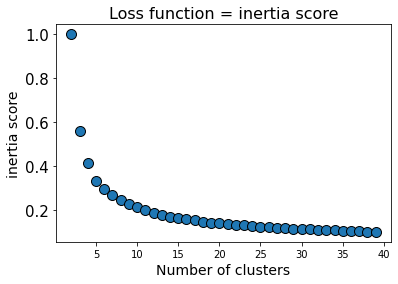

In [152]:
#km_score = []
km_inertia = []

K = range(2,40)
for k in K:
    km = KMeans(n_clusters=k,n_init=10,random_state=0).fit(npf2rows)
    preds = km.predict(npf2rows)
    
    #km_score.append(km.score(npf2rows))
    km_inertia.append(km.inertia_)  # Almost the same as the -(previous)
    
#plotScore(km_score,"km_score")
plotScore(km_inertia/km_inertia[0],"inertia")


In [0]:
kmeans = KMeans(n_clusters=6,n_init=10,algorithm='full')#,random_state=42)
kmeans.fit(npf2rows)
# Predict the closest cluster each sample in npf belongs to
kmeans_results = kmeans.predict(npf2rows)

No handles with labels found to put in legend.


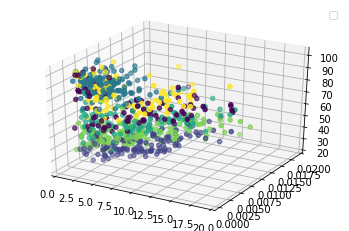

In [154]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(npf["HYY_META.H2O168.mean"], npf["CS.mean"], npf["HYY_META.RHIRGA168.mean"],c=kmeans_results)
plt.legend()

In [155]:
px.scatter_3d(data_frame=npf, x="HYY_META.H2O168.mean", y="CS.mean", z="HYY_META.SO2168.mean",color=kmeans_results)

#### Clustering Rows with normalisation

In [0]:
scaler = StandardScaler()

In [0]:
npf2rows_normed = scaler.fit(npf2rows).transform(npf2rows)

In [158]:
npf2rows_normed.shape

(724, 100)

In [0]:
#kmeans.labels_ == kmeans_results ## TRUE

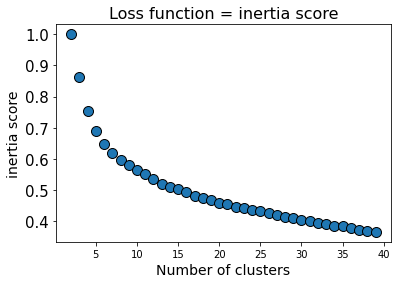

In [160]:
km_inertia = []

K = range(2,40)
for k in K:
    km = KMeans(n_clusters=k,n_init=10,random_state=0).fit(npf2rows_normed)
    
    km_inertia.append(km.inertia_)  # Almost the same as the -(previous)
    
plotScore(km_inertia/km_inertia[0],"inertia")


In [0]:
kmeans = KMeans(n_clusters=6,n_init=10,algorithm='full')#,random_state=42)
kmeans.fit(npf2rows_normed)
# Predict the closest cluster each sample in npf belongs to
kmeans_results = kmeans.predict(npf2rows_normed)

In [162]:
px.scatter_3d(data_frame=npf, x="HYY_META.H2O168.mean", y="CS.mean", z="HYY_META.SO2168.mean",color=kmeans_results)

The clusters look a bit more understandable. It looks as the scaling has some effect.

#### Clustering Columns with normalisations

In [0]:
npf2columns = npf2rows.transpose()

scaler = StandardScaler()
npf2columns_normed = scaler.fit(npf2columns).transform(npf2columns)

In [164]:
npf2columns_normed[:5,:3]

array([[ 2.17950805,  2.26631111,  2.21967902],
       [-0.28711813, -0.28142934, -0.28997263],
       [ 2.17875484,  2.2638972 ,  2.21926056],
       [-0.28722742, -0.28228542, -0.28999094],
       [ 2.18257985,  2.27047407,  2.22340671]])

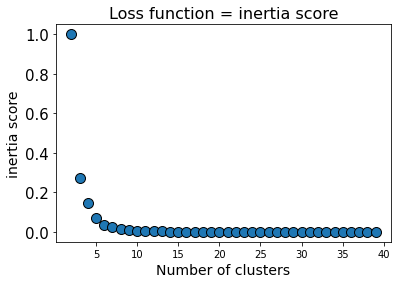

In [165]:
km_inertia = []

K = range(2,40)
for k in K:
    km = KMeans(n_clusters=k,n_init=10,random_state=0).fit(npf2columns_normed)
    
    km_inertia.append(km.inertia_)  # Almost the same as the -(previous)
    
plotScore(km_inertia/km_inertia[0],"inertia")


In [0]:
kmeans = KMeans(n_clusters=10,n_init=10,algorithm='full')#,random_state=42)
kmeans.fit(npf2columns_normed)
# Predict the closest cluster each sample in npf belongs to
kmeans_results = kmeans.predict(npf2columns_normed)

In [167]:
px.scatter_3d(data_frame=npf2columns_normed, x=1, y=2, z=3,color=kmeans_results)

* Cluster the days into four clusters and make a confusion matrix (contingency table where the rows are the true classes, columns the cluster indices, and entries the counts). Order the rows and columns so that the sum of diagonal entries in your contingency table is maximized. Where are most "errors" made (if you would use your clusters as a classifier)? (Hint: use the Hungarian algorithm as shown in L6 to re-order the rows and columns of your contingency table.)


In [0]:
scaler = StandardScaler()

In [0]:
npf2rows_normed = scaler.fit(npf2rows).transform(npf2rows)

In [170]:
npf2rows_normed.shape

(724, 100)

In [0]:
#px.scatter_3d(data_frame=npf, x="HYY_META.H2O168.mean", y="CS.mean", z="HYY_META.SO2168.mean",color=kmeans_results)

In [172]:
# from lecture notes:
npf_kmeans = KMeans(n_clusters=4,random_state=42).fit(npf2rows_normed)
tb_npf = pd.crosstab(npf["event"],pd.Series(npf_kmeans.labels_,name="cluster"))
#tb_npf

# Hungarian algorithm?
row_ind, col_ind = linear_sum_assignment(tb_npf,maximize=True)
print("best match accuracy %.4f" % (np.array(tb_npf.iloc[row_ind,col_ind]).trace()/npf.shape[0]))
tb_npf.iloc[row_ind,col_ind]

best match accuracy 0.4862


cluster,0,3,1,2
event,,,,
II,64,2,86,21
Ia,5,0,21,12
Ib,30,0,81,8
nonevent,147,20,20,207


In [173]:
# from lecture notes:
npf_kmeans = KMeans(n_clusters=4,random_state=42).fit(npf2rows)
tb_npf = pd.crosstab(npf["event"],pd.Series(npf_kmeans.labels_,name="cluster"))
#tb_npf

# Hungarian algorithm?
row_ind, col_ind = linear_sum_assignment(tb_npf,maximize=True)
print("best match accuracy %.4f" % (np.array(tb_npf.iloc[row_ind,col_ind]).trace()/npf.shape[0]))
tb_npf.iloc[row_ind,col_ind]

best match accuracy 0.4558


cluster,0,3,2,1
event,,,,
II,66,46,47,14
Ia,14,3,9,12
Ib,44,20,52,3
nonevent,56,81,48,209


With normalised data the events are better "classified" into the clusters.

The accuracy score is only a little bit better

## Problem 2

*Learning objective: familiarity with hierarchical clustering and tools.*

Continue with the same dataset as in Problem 1 above.

### Tasks

* Try clustering of your matrix (rows or columns) with hierarchical clustering. Produce a dendrogram and corresponding flat clustering (e.g., by splitting the dendrogram with [fcluster](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.fcluster.html)). Try to find at least one interesting feature and/or reproduce some of the properties of hierarchical clustering (e.g., differences between linkage function) discussed in the lecture. 

In [0]:
from scipy.cluster.hierarchy import ward, fcluster, linkage, dendrogram
from scipy.spatial.distance import pdist
Z_ward = ward(pdist(npf2rows_normed[:100,:4]))
Z_single = linkage(pdist(npf2rows_normed[:100,:4]))
Z_centroid = linkage(pdist(npf2rows_normed[:100,:4]),method='centroid')

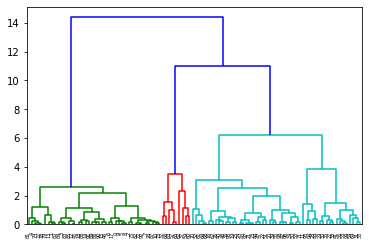

In [188]:
dendrogram(Z_ward);

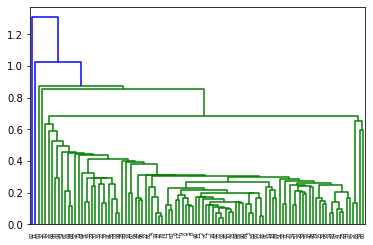

In [189]:
dendrogram(Z_single);

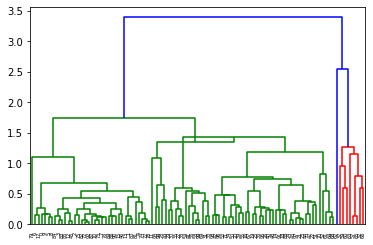

In [192]:
dendrogram(Z_centroid);

In [195]:
fcluster(Z_ward, t=4, criterion='distance'),fcluster(Z_single, t=0.8, criterion='distance'),fcluster(Z_centroid, t=2, criterion='distance')

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 3, 1, 1, 3, 3, 3,
        3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 2, 4, 3, 4, 3, 2, 4, 3, 3, 4, 3, 3,
        3, 1, 1, 3, 3, 4, 3, 3, 3, 3, 4, 3, 4, 2, 4, 2, 2, 3, 2, 2, 3, 2,
        2, 3, 3, 4, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 4, 4, 3, 3, 3, 3, 4], dtype=int32),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 3, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 3, 2, 1, 2,
        2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

Ward linkage seems to work best. Single linkage puts almost everything in a same cluster. Centroid does a bit better but still almost everything is in the same cluster.
